In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

data_src = './data/mt_2.xls'
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
names = ['author', 'rating', 'date', 'year', 'nemu']
data = pd.read_excel(data_src, header=None, names=names)
data.author.fillna('匿名用户', inplace=True)

In [5]:
data.date = pd.to_datetime(data.date, format='%Y-%m-%d')
data['year'] = data.date.map(lambda x: x.strftime('%Y'))
data['month'] = data.date.map(lambda x: x.strftime('%Y-%m'))
data['date'] = data.date.map(lambda x: x.strftime('%Y-%m-%d'))

<AxesSubplot:xlabel='year'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


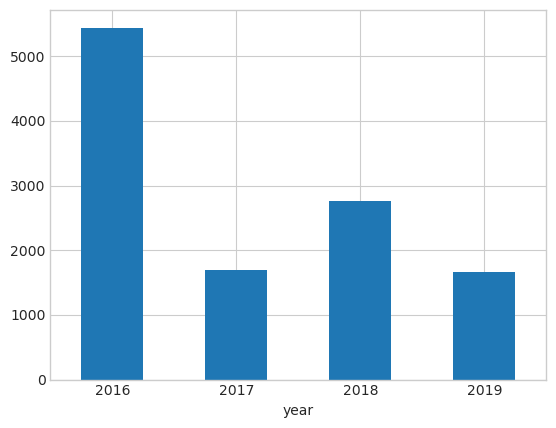

In [6]:
# 去除2015年的数据
data[data.year != '2015'].groupby('year').rating.count().plot(kind='bar', rot=0)

In [7]:
# 最多次购买的前10位用户， 不包含匿名用户
data[data.author != '匿名用户'].groupby('author').rating.count().sort_values(ascending=False).head(10)

author
小样儿yy           21
vQH902377029    14
zby0204         11
那里？             11
棒棒糖胖公主          11
GCL12345677     10
123456789的兔子     9
xrw徐芮婉           9
公主变女王            9
yukiting2007     8
Name: rating, dtype: int64

month
2015-04    0.037791
2015-05    0.042708
2015-06    0.038941
2015-07    0.034014
2015-08    0.039672
2015-09    0.056338
2015-10    0.051913
2015-11    0.055646
2015-12    0.054726
2016-01    0.051661
2016-02    0.042857
2016-03    0.046512
2016-04    0.050290
2016-05    0.046371
2016-06    0.040752
2016-07    0.060703
2016-08    0.056150
2016-09    0.046512
2016-10    0.027237
2016-11    0.066079
2016-12    0.062500
2017-01    0.063291
2017-02    0.024845
2017-03    0.022222
2017-04    0.041958
2017-05    0.052632
2017-06    0.063636
2017-07    0.009901
2017-08    0.033708
2017-09    0.087912
2017-10    0.037975
2017-11    0.031579
2017-12    0.042857
2018-01    0.040404
2018-02    0.061538
2018-03    0.039604
2018-04    0.012821
2018-05    0.015152
2018-06    0.079602
2018-07    0.075949
2018-08    0.070896
2018-09    0.110390
2018-10    0.105000
2018-11    0.096447
2018-12    0.086957
2019-01    0.077778
2019-02    0.084615
2019-03    0.086957
2019-04    0.144144
2019-05    0.1

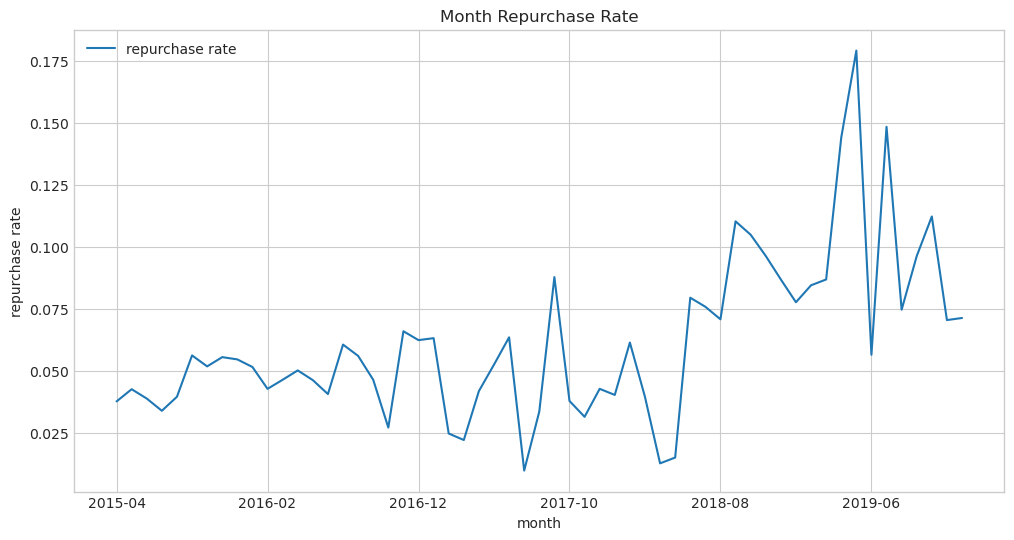

In [26]:
# 计算月复购率
# 1. 计算每个用户每个月的购买次数
user_month = data.groupby(['author', 'month']).rating.count().reset_index()
# 2. 计算每个月 多次购买用户占比
user_month.groupby('month').apply(lambda x: x[x.rating > 1].shape[0] / x.shape[0])
print(user_month.groupby('month').apply(lambda x: x[x.rating > 1].shape[0] / x.shape[0]))
# 3. 绘制复购率曲线
plt.figure(figsize=(12, 6))
user_month.groupby('month').apply(lambda x: x[x.rating > 1].shape[0] / x.shape[0]).plot(kind='line', rot=0)
plt.title('Month Repurchase Rate')
plt.xlabel('month')
plt.ylabel('repurchase rate')
plt.legend(['repurchase rate'])
plt.show()

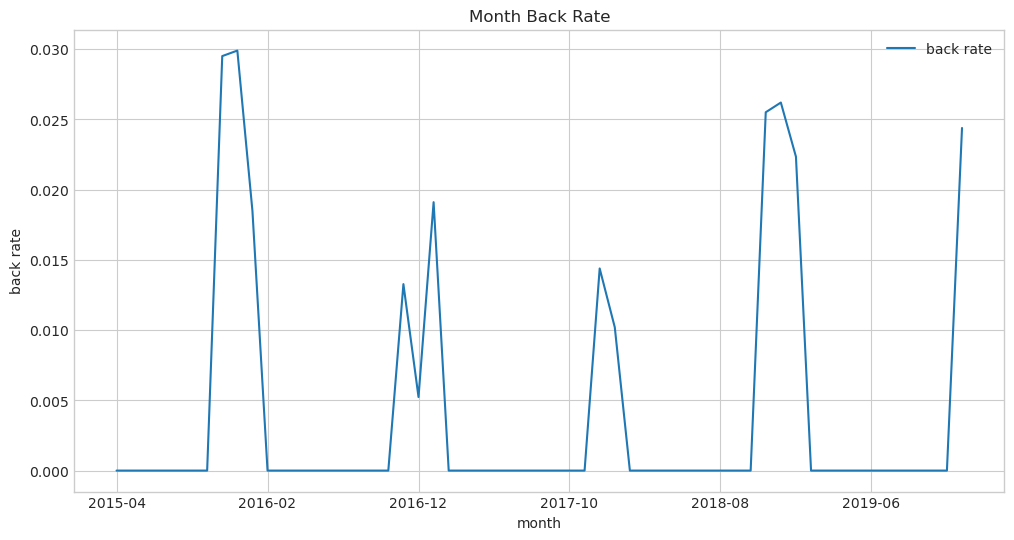

In [31]:
# 计算月回购率
month_user = data[data.author != '匿名用户'].groupby(['author', 'month']).rating.count().reset_index()
# 定义一个lambda函数, 返回上一个月份
get_last_month = lambda x: x[:5] + str(int(x[5:]) - 1) if int(x[5:]) > 1 else str(int(x[:4]) - 1) + '-12'
# 定义一个lambda函数, 判断某个用户在某个月是否购买过
judge_last_month = lambda user, month: True if user in month_user[month_user.month == get_last_month(month)].author.values else False
# 定义一个lambda函数, 统计某个月份的回购率 (本月用户在上月购买过的数量 / 本月购买用户数量) 如果本月没有购买用户, 则回购率为0
get_back_rate = lambda month: month_user[month_user.month == month].apply(lambda x: judge_last_month(x.author, x.month), axis=1).sum() / month_user[month_user.month == month].shape[0] if month_user[month_user.month == month].shape[0] > 0 else 0
# 定义一个lambda函数, 统计某个月份的回购用户数量
get_back_user = lambda month: month_user[month_user.month == month].apply(lambda x: judge_last_month(x.author, x.month), axis=1).sum()

# 计算每个月的回购率, 按照时间排序, 并绘制回购率曲线
plt.figure(figsize=(12, 6))
pd.Series([get_back_rate(month) for month in sorted(month_user.month.unique())], index=sorted(month_user.month.unique())).plot(kind='line', rot=0)
# x轴为对应月份 格式为 2015-01
plt.title('Month Back Rate')
plt.xlabel('month')
plt.ylabel('back rate')
plt.legend(['back rate'])
plt.show()
